In [19]:
import sys
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from scipy.spatial.distance import cosine
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors
from google.colab import  drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Load VGG16**

In [2]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 1s 0us/step


# **Import favicons**

In [27]:
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    names = []
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            fullName = os.path.join(root, name)
            fileList.append(fullName)
            names.append(name)
    return fileList, names

# load the original image
myFileList, names  = createFileList('/content/drive/My Drive/Final_Year_Project/ML/Favicons/')
print(myFileList)

/content/drive/My Drive/Final_Year_Project/ML/Favicons/
['/content/drive/My Drive/Final_Year_Project/ML/Favicons/bos.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/bnp.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/citi.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/dbs.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/maybank.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/sc.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/amazon.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/carousell.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/castlery.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/courts.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/zalora.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/youtube.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/linkedin.png', '/content/drive/My Drive/Final_Year_Project/ML/Favic

## **Print favicon**

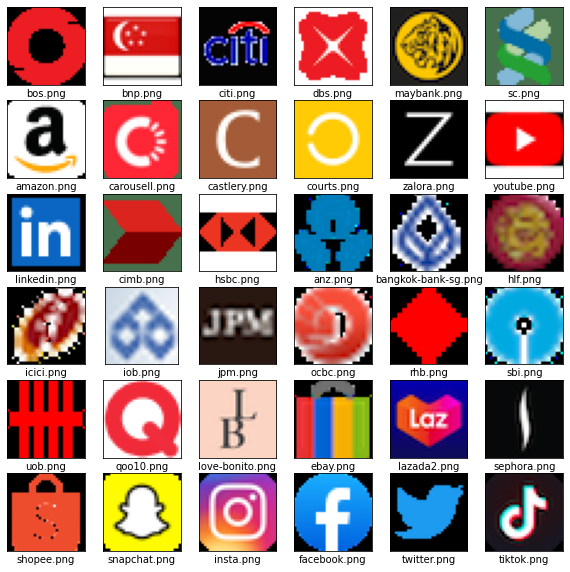

In [10]:
plt.figure(figsize=(10,10))
for i in range(len(myFileList)):
    img = tf.keras.preprocessing.image.load_img(myFileList[i])
    plt.subplot(6,6,i+1) #google "subplot"...first two args are the size of the "matrix of figures"
    #third arg= which position in the matrix am I looking at
    plt.xticks([]) #prevent pyplot from adding "ticks" which are the little bars that say "1,2,3" or "0.1,0.2" on the x axis
    plt.yticks([])# same for y axis
    plt.grid(False)
    plt.imshow(img)
    plt.xlabel(names[i])
plt.show()

# **Function to extract features from the favicons**

In [11]:
def extract_features(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32, 32))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    features1 = features.flatten()
    #features2 = np.reshape(features, (features.shape[0], -1))
    return features1

In [12]:
def extract_features_for_k_cluster(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32, 32))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    #features1 = features.flatten()
    features2 = np.reshape(features, (features.shape[0], -1))
    return features2

# **Apply the Feature Extraction functions**

In [13]:
favicons = []
for file in myFileList:
    feature1 = extract_features(file)
    favicons.append(feature1)

1/1 [==============================] - 0s 70ms/step


In [14]:
features = []
for file in myFileList:
    feature2 = extract_features_for_k_cluster(file)
    features.append(feature2)

1/1 [==============================] - 0s 50ms/step


# **Checking cosine similarity between 2 favicons**

In [17]:
from scipy.spatial.distance import cosine
from scipy.spatial import distance

metric = 'cosine'

In [20]:
dc = distance.cdist([favicons[0]], [favicons[0]], metric)[0]
print(dc)

[0.]


# **K-clustering model for top 5**

In [23]:
def find_similar_images(query_img_features, features, k=5):

  dataset_features = features
  dataset_features = np.vstack(dataset_features)
	
	# Find the k most similar images using the nearest neighbors algorithm
  neighbors = NearestNeighbors(n_neighbors=k, metric='cosine')
  neighbors.fit(dataset_features)
  distances, indices = neighbors.kneighbors(query_img_features)
	
  # Return the filenames of the most similar favicons
  filenames = []
  for i in indices[0]:
    filename = myFileList[i]
    filenames.append(filename)
  return filenames

<Figure size 432x288 with 0 Axes>

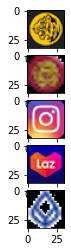

In [26]:
similar_images = find_similar_images(features[4], features, k=5)
result = []
for i in similar_images:
  img = tf.keras.preprocessing.image.load_img(i)
  result.append(img)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(5,1) 

# use the created array to output your multiple images
axarr[0].imshow(result[0])
axarr[1].imshow(result[1])
axarr[2].imshow(result[2])
axarr[3].imshow(result[3])
axarr[4].imshow(result[4])